In [39]:
import qtm.qcompilation
import numpy as np
import types
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


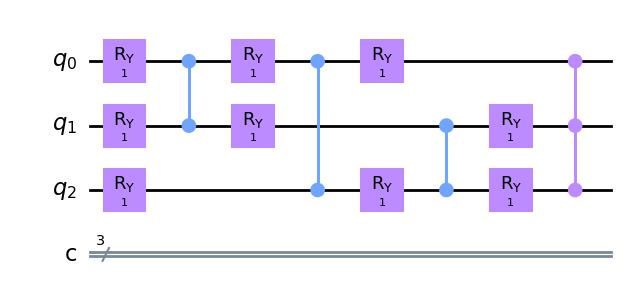

In [69]:
import qiskit
qtm.ansatz.create_hypergraph_ansatz(qiskit.QuantumCircuit(3,3), np.ones((3*3)*1), 1).draw('mpl')

In [19]:
num_qubits = 3
num_layers = 1

thetas = np.ones((2*num_qubits)*num_layers)
compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_polygongraph_ansatz,
    vdagger = qtm.state.create_AME_state_fake(num_qubits).inverse(),
    optimizer = 'adam',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
compiler.fit(num_steps = 100, verbose = 1)























Step:   0%|          | 0/100 [01:52<?, ?it/s]















































































Step: 100%|██████████| 100/100 [00:27<00:00,  3.58it/s]


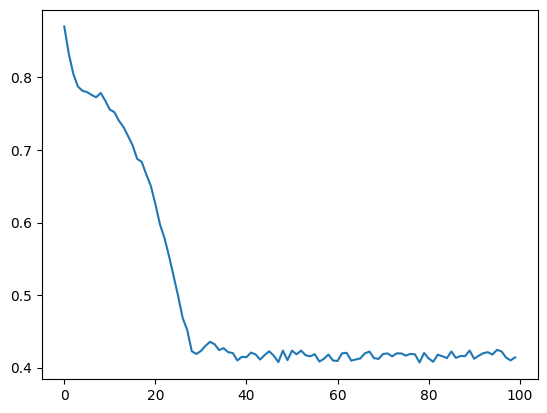

In [20]:
import matplotlib.pyplot as plt
plt.plot(compiler.loss_values)

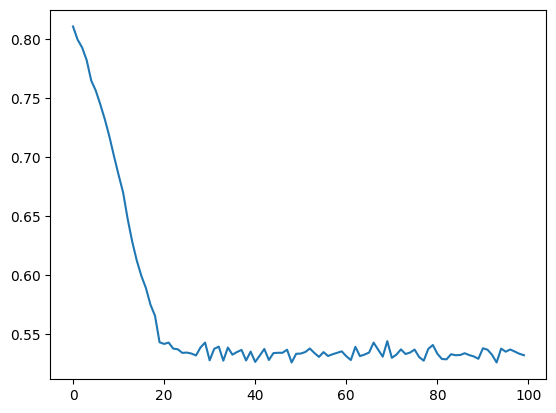

In [15]:
import matplotlib.pyplot as plt
plt.plot(compiler.loss_values)

In [21]:
np.min(compiler.loss_values)

0.4070626487409523

In [62]:
import qtm.qcompilation
import numpy as np
import types
num_qubits = 3
num_layers = 1

for optimizer in ['adam','qng_fubini_study']:
    thetas = np.ones((2*num_qubits)*num_layers)
    compiler = qtm.qcompilation.QuantumCompilation(
        u = qtm.ansatz.create_polygongraph_ansatz,
        vdagger = qtm.state.create_w_state(num_qubits).inverse(),
        optimizer = optimizer,
        loss_func = 'loss_fubini_study',
        thetas = thetas,
        is_evolutional=False,
        num_layers = num_layers
    )
    compiler.fit(num_steps = 100, verbose = 1)
    compiler.save("", text = "", path = f"../experiments/polygon_graph_w_{num_layers}_layer_{optimizer}/3/", save_all = True)
    


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)




































































































Step: 100%|██████████| 100/100 [00:21<00:00,  4.65it/s]






Step:   0%|          | 0/100 [03:47<?, ?it/s]































































































Step: 100%|██████████| 100/100 [00:34<00:00,  2.91it/s]


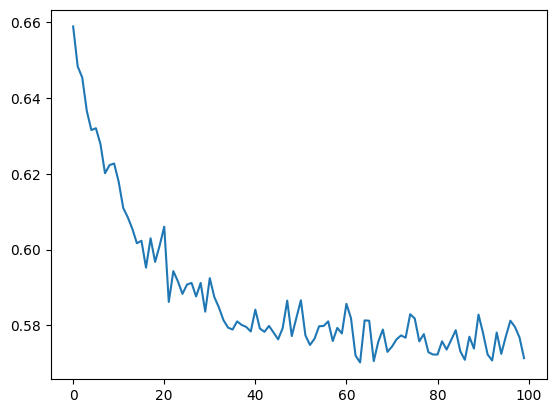

In [57]:
import matplotlib.pyplot as plt
plt.plot(compiler.loss_values)

In [53]:
np.min(compiler.loss_values)

0.0

Step:   0%|          | 0/100 [04:07<?, ?it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


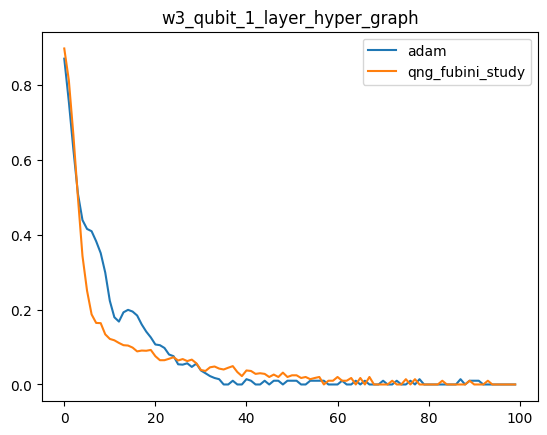

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

ansatz = "hyper_graph"
for optimizer in ['adam', 'qng_fubini_study']:
    loss = pd.read_csv(f"../experiments/{ansatz}_w_1_layer_{optimizer}/3/loss_values.csv", sep=",", header=None)
    # loss_evo = pd.read_csv("../experiments/hyper_graph_ame_2_layer_adam_evo/3/loss_values.csv", sep=",", header=None)
    #loss = loss.applymap(lambda s: complex(s.replace('i', 'j'))).values
    plt.plot(loss, label = optimizer)
plt.title(f"w3_qubit_1_layer_{ansatz}")
plt.legend()
plt.savefig(f"w3_qubit_1_layer_{ansatz}_loss.eps", format = "eps", dpi = 1000)